In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("velib_backup.csv")

In [3]:
df.head()

,stationCode,station_id,num_bikes_available,num_bikes_available_mechanical,num_bikes_available_ebike,num_docks_available,is_installed,is_returning,is_renting,last_reported,api_calltime
0,NaN,213688169,14,NaN,NaN,21,1,1,1,1731677115,1731677400
1,NaN,17278902806,4,NaN,NaN,16,1,1,1,1731677359,1731677400
2,NaN,36255,3,NaN,NaN,18,1,1,1,1731677171,1731677400
3,NaN,251039991,8,NaN,NaN,17,1,1,1,1731677193,1731677400
4,NaN,85002689,25,NaN,NaN,35,1,1,1,1731677275,1731677400


In [4]:
df_no_na = df.dropna()

In [5]:
df_no_na['api_calltime'] = pd.to_datetime(df_no_na['api_calltime'], unit='s')
df_no_na['last_reported'] = pd.to_datetime(df_no_na['last_reported'], unit='s')


/tmp/ipykernel_520046/4150218823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['api_calltime'] = pd.to_datetime(df_no_na['api_calltime'], unit='s')
/tmp/ipykernel_520046/4150218823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['last_reported'] = pd.to_datetime(df_no_na['last_reported'], unit='s')


In [6]:
df_no_na

,stationCode,station_id,num_bikes_available,num_bikes_available_mechanical,num_bikes_available_ebike,num_docks_available,is_installed,is_returning,is_renting,last_reported,api_calltime
1485,16107.0,213688169,15,10.0,5.0,20,1,1,1,2024-11-15 13:25:15,2024-11-15 13:45:01
1486,44015.0,17278902806,4,1.0,3.0,16,1,1,1,2024-11-15 13:28:26,2024-11-15 13:45:01
1487,9020.0,36255,3,1.0,2.0,18,1,1,1,2024-11-15 13:26:11,2024-11-15 13:45:01
1488,14111.0,251039991,2,0.0,2.0,17,1,1,1,2024-11-15 13:26:33,2024-11-15 13:45:01
1489,14014.0,85002689,26,17.0,9.0,34,1,1,1,2024-11-15 13:27:55,2024-11-15 13:45:01
...,...,...,...,...,...,...,...,...,...,...,...
3277714,4010.0,476155906,43,33.0,10.0,2,1,1,1,2024-12-08 12:31:19,2024-12-08 13:00:01
3277715,4005.0,516395829,13,0.0,13.0,2,1,1,1,2024-12-08 12:28:40,2024-12-08 13:00:01
3277716,8004.0,315022587,45,30.0,15.0,21,1,1,1,2024-12-08 12:30:23,2024-12-08 13:00:01
3277717,42004.0,368766689,23,11.0,12.0,1,1,1,1,2024-12-08 12:30:29,2024-12-08 13:00:01


In [7]:
import requests

# API URL
api_url = "https://velib-metropole-opendata.smovengo.cloud/opendata/Velib_Metropole/station_information.json"

# Fetch data from the API
response = requests.get(api_url)
data = response.json()

# Extract station_id, lat, and lon
stations = data['data']['stations']
station_location_dict = {station['station_id']: (station['lat'], station['lon']) for station in stations}

# Print the dictionary (key: station_id, value: (lat, lon))
print(station_location_dict)


{213688169: (48.865983, 2.275725), 19179944124: (48.798922410229, 2.4537451531298), 17278902806: (48.778192750803, 2.3963020229163), 36255: (48.87929591733507, 2.3373600840568547), 251039991: (48.837525839067, 2.3360354080796), 85002689: (48.819428333369, 2.3433353751898), 2515829865: (48.93626891059109, 2.3588666820200914), 516709288: (48.855907555969, 2.3925706744194), 120827885: (48.875448033960744, 2.315508019010038), 66491398: (48.835092787824, 2.3534681351338), 37874517: (48.85165383178419, 2.3308077827095985), 210565680: (48.848563233059, 2.3204218259346), 210403080: (48.84389286531899, 2.3519663885235786), 210561800: (48.84708159081946, 2.321374788880348), 209063434: (48.91039875761846, 2.3851355910301213), 94555589: (48.81580226360801, 2.376804985105991), 19331959862: (48.779035118572, 2.4609763908985), 43195240: (48.835583838706, 2.2325500845909), 501862076: (48.862453313908, 2.1961666225454), 17486274358: (48.908168131015, 2.4530601033354), 210566542: (48.851296433665276, 2.

In [8]:
import json
import requests

# Load JSON data from a local file
with open("station_information.json", "r") as file:
    data = json.load(file)

stations = data['data']['stations']
station_location_dict = {station['station_id']: (station['lat'], station['lon']) for station in stations}


In [9]:
station_location_dict

{213688169: (48.865983, 2.275725),
 19179944124: (48.798922410229, 2.4537451531298),
 17278902806: (48.778192750803, 2.3963020229163),
 36255: (48.87929591733507, 2.3373600840568547),
 251039991: (48.837525839067, 2.3360354080796),
 85002689: (48.819428333369, 2.3433353751898),
 2515829865: (48.93626891059109, 2.3588666820200914),
 516709288: (48.855907555969, 2.3925706744194),
 120827885: (48.875448033960744, 2.315508019010038),
 66491398: (48.835092787824, 2.3534681351338),
 37874517: (48.85165383178419, 2.3308077827095985),
 210565680: (48.848563233059, 2.3204218259346),
 210403080: (48.84389286531899, 2.3519663885235786),
 210561800: (48.84708159081946, 2.321374788880348),
 209063434: (48.91039875761846, 2.3851355910301213),
 94555589: (48.81580226360801, 2.376804985105991),
 19331959862: (48.779035118572, 2.4609763908985),
 43195240: (48.835583838706, 2.2325500845909),
 501862076: (48.862453313908, 2.1961666225454),
 17486274358: (48.908168131015, 2.4530601033354),
 210566542: (48

In [10]:
import pandas as pd

# Assuming your DataFrame is named df_no_na
# Map the latitude and longitude to the DataFrame
df_no_na['lat'] = df_no_na['station_id'].map(lambda x: station_location_dict.get(x, (None, None))[0])
df_no_na['lon'] = df_no_na['station_id'].map(lambda x: station_location_dict.get(x, (None, None))[1])

# Display the updated DataFrame
print(df_no_na)


/tmp/ipykernel_520046/1830894157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['lat'] = df_no_na['station_id'].map(lambda x: station_location_dict.get(x, (None, None))[0])


         stationCode   station_id  num_bikes_available  \
1485         16107.0    213688169                   15   
1486         44015.0  17278902806                    4   
1487          9020.0        36255                    3   
1488         14111.0    251039991                    2   
1489         14014.0     85002689                   26   
...              ...          ...                  ...   
3277714       4010.0    476155906                   43   
3277715       4005.0    516395829                   13   
3277716       8004.0    315022587                   45   
3277717      42004.0    368766689                   23   
3277718       9104.0    129026597                   13   

         num_bikes_available_mechanical  num_bikes_available_ebike  \
1485                               10.0                        5.0   
1486                                1.0                        3.0   
1487                                1.0                        2.0   
1488                   

/tmp/ipykernel_520046/1830894157.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['lon'] = df_no_na['station_id'].map(lambda x: station_location_dict.get(x, (None, None))[1])


In [13]:
response = requests.get(api_url, timeout=10)


In [14]:
df_no_na[df_no_na.isna() == True].value_counts()

Series([], dtype: int64)

In [15]:
df_no_na

,stationCode,station_id,num_bikes_available,num_bikes_available_mechanical,num_bikes_available_ebike,num_docks_available,is_installed,is_returning,is_renting,last_reported,api_calltime,lat,lon
1485,16107.0,213688169,15,10.0,5.0,20,1,1,1,2024-11-15 13:25:15,2024-11-15 13:45:01,48.865983,2.275725
1486,44015.0,17278902806,4,1.0,3.0,16,1,1,1,2024-11-15 13:28:26,2024-11-15 13:45:01,48.778193,2.396302
1487,9020.0,36255,3,1.0,2.0,18,1,1,1,2024-11-15 13:26:11,2024-11-15 13:45:01,48.879296,2.337360
1488,14111.0,251039991,2,0.0,2.0,17,1,1,1,2024-11-15 13:26:33,2024-11-15 13:45:01,48.837526,2.336035
1489,14014.0,85002689,26,17.0,9.0,34,1,1,1,2024-11-15 13:27:55,2024-11-15 13:45:01,48.819428,2.343335
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277714,4010.0,476155906,43,33.0,10.0,2,1,1,1,2024-12-08 12:31:19,2024-12-08 13:00:01,48.855022,2.361232
3277715,4005.0,516395829,13,0.0,13.0,2,1,1,1,2024-12-08 12:28:40,2024-12-08 13:00:01,48.851297,2.362453
3277716,8004.0,315022587,45,30.0,15.0,21,1,1,1,2024-12-08 12:30:23,2024-12-08 13:00:01,48.870406,2.323244
3277717,42004.0,368766689,23,11.0,12.0,1,1,1,1,2024-12-08 12:30:29,2024-12-08 13:00:01,48.819116,2.396664


In [16]:
df_no_na.to_csv("df_no_na.csv")

In [17]:
import pandas as pd

# Convert 'api_calltime' to a datetime format if not already done
df_no_na['api_call_datetime'] = pd.to_datetime(df_no_na['api_calltime'], unit='s')

# Add a new column with the day of the week
df_no_na['day_of_week'] = df_no_na['api_call_datetime'].dt.day_name()

# Display the updated DataFrame
print(df_no_na)


/tmp/ipykernel_520046/260760263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['api_call_datetime'] = pd.to_datetime(df_no_na['api_calltime'], unit='s')


         stationCode   station_id  num_bikes_available  \
1485         16107.0    213688169                   15   
1486         44015.0  17278902806                    4   
1487          9020.0        36255                    3   
1488         14111.0    251039991                    2   
1489         14014.0     85002689                   26   
...              ...          ...                  ...   
3277714       4010.0    476155906                   43   
3277715       4005.0    516395829                   13   
3277716       8004.0    315022587                   45   
3277717      42004.0    368766689                   23   
3277718       9104.0    129026597                   13   

         num_bikes_available_mechanical  num_bikes_available_ebike  \
1485                               10.0                        5.0   
1486                                1.0                        3.0   
1487                                1.0                        2.0   
1488                   

/tmp/ipykernel_520046/260760263.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['day_of_week'] = df_no_na['api_call_datetime'].dt.day_name()


/tmp/ipykernel_520046/1016709832.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['api_call_datetime'] = pd.to_datetime(station_data['api_calltime'], unit='s')


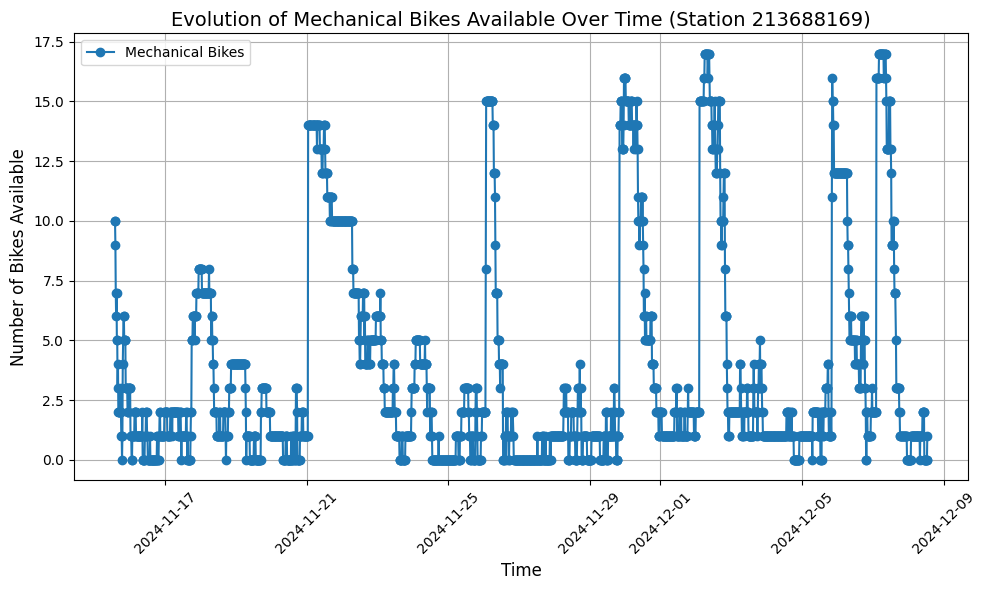

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the specific station
station_data = df_no_na[df_no_na['station_id'] == 213688169]

# Convert 'api_calltime' to datetime if not already done
station_data['api_call_datetime'] = pd.to_datetime(station_data['api_calltime'], unit='s')

# Sort data by time
station_data = station_data.sort_values(by='api_call_datetime')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(station_data['api_call_datetime'], station_data['num_bikes_available_mechanical'], marker='o', linestyle='-', label='Mechanical Bikes')

# Customize the plot
plt.title('Evolution of Mechanical Bikes Available Over Time (Station 213688169)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Bikes Available', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_520046/2929760367.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['api_call_datetime'] = pd.to_datetime(station_data['api_calltime'], unit='s')


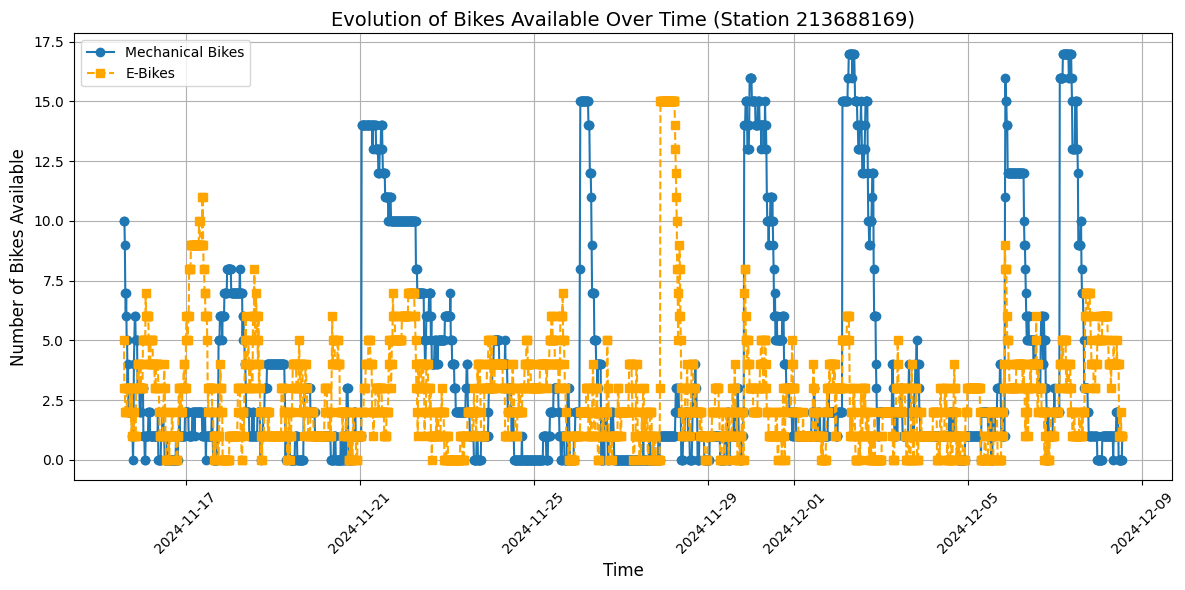

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the specific station
station_data = df_no_na[df_no_na['station_id'] == 213688169]

# Convert 'api_calltime' to datetime if not already done
station_data['api_call_datetime'] = pd.to_datetime(station_data['api_calltime'], unit='s')

# Sort data by time
station_data = station_data.sort_values(by='api_call_datetime')

# Plot the data
plt.figure(figsize=(12, 6))

# Plot mechanical bikes
plt.plot(station_data['api_call_datetime'], station_data['num_bikes_available_mechanical'], 
         marker='o', linestyle='-', label='Mechanical Bikes')

# Plot e-bikes
plt.plot(station_data['api_call_datetime'], station_data['num_bikes_available_ebike'], 
         marker='s', linestyle='--', label='E-Bikes', color='orange')

# Customize the plot
plt.title('Evolution of Bikes Available Over Time (Station 213688169)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Bikes Available', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_520046/3963686705.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['api_call_datetime'] = pd.to_datetime(station_data['api_calltime'], unit='s')


Text(0.5, 0, 'Time')

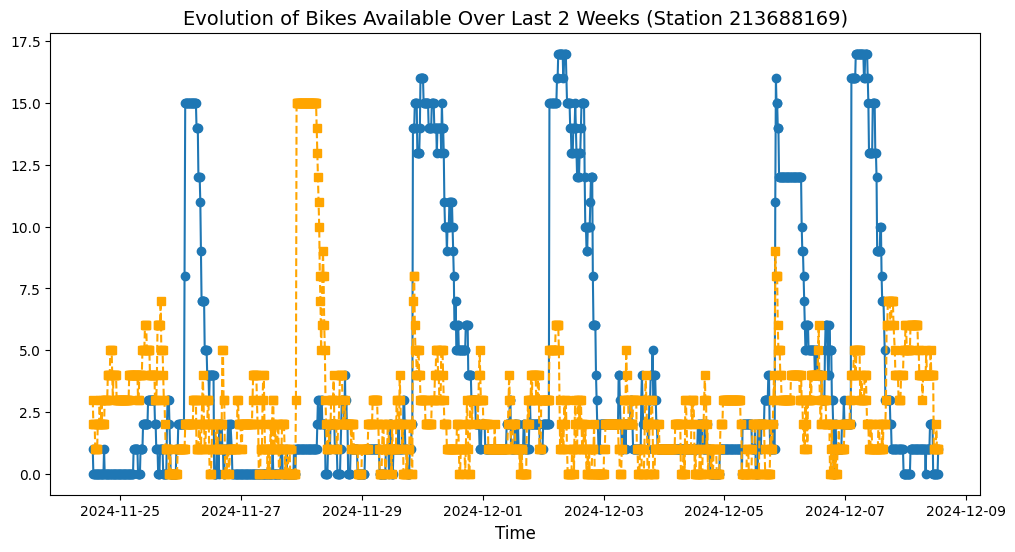

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Filter data for the specific station
station_data = df_no_na[df_no_na['station_id'] == 213688169]

# Convert 'api_calltime' to datetime if not already done
station_data['api_call_datetime'] = pd.to_datetime(station_data['api_calltime'], unit='s')

# Calculate the cutoff date (last 2 weeks)
cutoff_date = station_data['api_call_datetime'].max() - timedelta(weeks=2)

# Filter data for the last 2 weeks
station_data_last_2_weeks = station_data[station_data['api_call_datetime'] >= cutoff_date]

# Sort data by time
station_data_last_2_weeks = station_data_last_2_weeks.sort_values(by='api_call_datetime')

# Plot the data
plt.figure(figsize=(12, 6))

# Plot mechanical bikes
plt.plot(station_data_last_2_weeks['api_call_datetime'], 
         station_data_last_2_weeks['num_bikes_available_mechanical'], 
         marker='o', linestyle='-', label='Mechanical Bikes')

# Plot e-bikes
plt.plot(station_data_last_2_weeks['api_call_datetime'], 
         station_data_last_2_weeks['num_bikes_available_ebike'], 
         marker='s', linestyle='--', label='E-Bikes', color='orange')

# Customize the plot
plt.title('Evolution of Bikes Available Over Last 2 Weeks (Station 213688169)', fontsize=14)
plt.xlabel('Time', fontsize=12)


/tmp/ipykernel_520046/3024437807.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['api_call_datetime'] = pd.to_datetime(station_data['api_calltime'], unit='s')


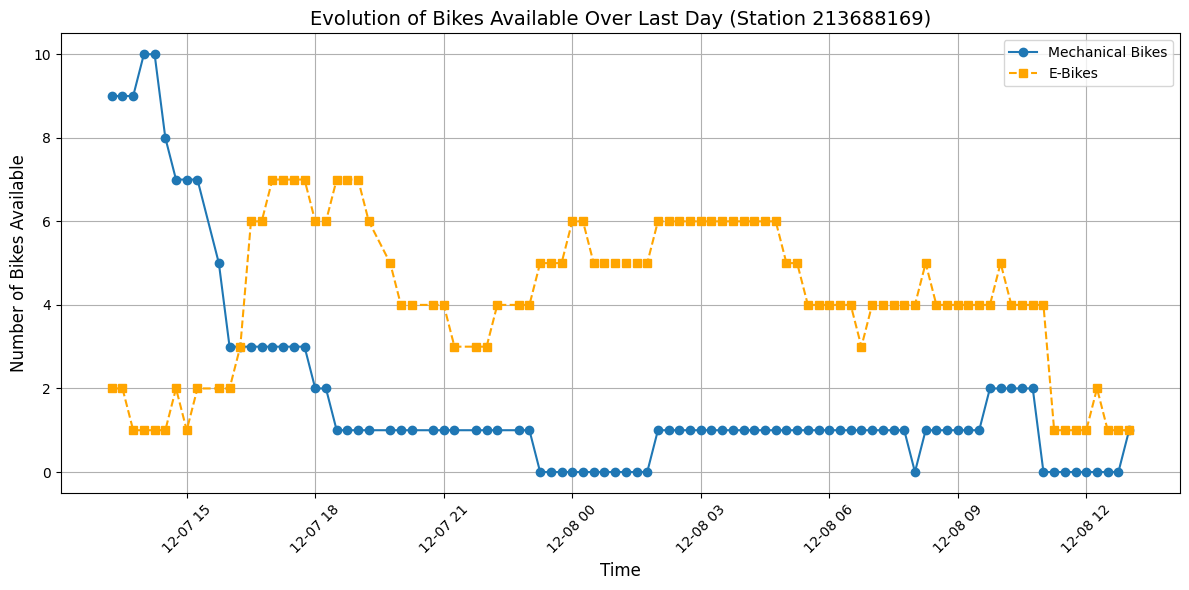

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Filter data for the specific station
station_data = df_no_na[df_no_na['station_id'] == 213688169]

# Convert 'api_calltime' to datetime if not already done
station_data['api_call_datetime'] = pd.to_datetime(station_data['api_calltime'], unit='s')

# Calculate the cutoff date (last 1 day)
cutoff_date = station_data['api_call_datetime'].max() - timedelta(days=1)

# Filter data for the last 1 day
station_data_last_day = station_data[station_data['api_call_datetime'] >= cutoff_date]

# Sort data by time
station_data_last_day = station_data_last_day.sort_values(by='api_call_datetime')

# Plot the data
plt.figure(figsize=(12, 6))

# Plot mechanical bikes
plt.plot(station_data_last_day['api_call_datetime'], 
         station_data_last_day['num_bikes_available_mechanical'], 
         marker='o', linestyle='-', label='Mechanical Bikes')

# Plot e-bikes
plt.plot(station_data_last_day['api_call_datetime'], 
         station_data_last_day['num_bikes_available_ebike'], 
         marker='s', linestyle='--', label='E-Bikes', color='orange')

# Customize the plot
plt.title('Evolution of Bikes Available Over Last Day (Station 213688169)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Bikes Available', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


## Time series - ARIMA

In [22]:
### Velib station close to Falguiere 
# 15112, 15113, 15132, 15017
# Further 15004,15027, 15018


In [23]:
df_all = df_no_na

In [24]:
df_all 

,stationCode,station_id,num_bikes_available,num_bikes_available_mechanical,num_bikes_available_ebike,num_docks_available,is_installed,is_returning,is_renting,last_reported,api_calltime,lat,lon,api_call_datetime,day_of_week
1485,16107.0,213688169,15,10.0,5.0,20,1,1,1,2024-11-15 13:25:15,2024-11-15 13:45:01,48.865983,2.275725,2024-11-15 13:45:01,Friday
1486,44015.0,17278902806,4,1.0,3.0,16,1,1,1,2024-11-15 13:28:26,2024-11-15 13:45:01,48.778193,2.396302,2024-11-15 13:45:01,Friday
1487,9020.0,36255,3,1.0,2.0,18,1,1,1,2024-11-15 13:26:11,2024-11-15 13:45:01,48.879296,2.337360,2024-11-15 13:45:01,Friday
1488,14111.0,251039991,2,0.0,2.0,17,1,1,1,2024-11-15 13:26:33,2024-11-15 13:45:01,48.837526,2.336035,2024-11-15 13:45:01,Friday
1489,14014.0,85002689,26,17.0,9.0,34,1,1,1,2024-11-15 13:27:55,2024-11-15 13:45:01,48.819428,2.343335,2024-11-15 13:45:01,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277714,4010.0,476155906,43,33.0,10.0,2,1,1,1,2024-12-08 12:31:19,2024-12-08 13:00:01,48.855022,2.361232,2024-12-08 13:00:01,Sunday
3277715,4005.0,516395829,13,0.0,13.0,2,1,1,1,2024-12-08 12:28:40,2024-12-08 13:00:01,48.851297,2.362453,2024-12-08 13:00:01,Sunday
3277716,8004.0,315022587,45,30.0,15.0,21,1,1,1,2024-12-08 12:30:23,2024-12-08 13:00:01,48.870406,2.323244,2024-12-08 13:00:01,Sunday
3277717,42004.0,368766689,23,11.0,12.0,1,1,1,1,2024-12-08 12:30:29,2024-12-08 13:00:01,48.819116,2.396664,2024-12-08 13:00:01,Sunday


In [25]:
def week_end(x): 
    if x in ["Sunday","Saturday"]: 
        return 1 
    else: 
        return 0 
    

In [26]:
df_all.columns

Index(['stationCode', 'station_id', 'num_bikes_available',
       'num_bikes_available_mechanical', 'num_bikes_available_ebike',
       'num_docks_available', 'is_installed', 'is_returning', 'is_renting',
       'last_reported', 'api_calltime', 'lat', 'lon', 'api_call_datetime',
       'day_of_week'],
      dtype='object')

In [27]:
df_all["is_weekend"] = df_all["day_of_week"].apply(week_end)

/tmp/ipykernel_520046/1648685118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["is_weekend"] = df_all["day_of_week"].apply(week_end)


In [28]:
df_all

,stationCode,station_id,num_bikes_available,num_bikes_available_mechanical,num_bikes_available_ebike,num_docks_available,is_installed,is_returning,is_renting,last_reported,api_calltime,lat,lon,api_call_datetime,day_of_week,is_weekend
1485,16107.0,213688169,15,10.0,5.0,20,1,1,1,2024-11-15 13:25:15,2024-11-15 13:45:01,48.865983,2.275725,2024-11-15 13:45:01,Friday,0
1486,44015.0,17278902806,4,1.0,3.0,16,1,1,1,2024-11-15 13:28:26,2024-11-15 13:45:01,48.778193,2.396302,2024-11-15 13:45:01,Friday,0
1487,9020.0,36255,3,1.0,2.0,18,1,1,1,2024-11-15 13:26:11,2024-11-15 13:45:01,48.879296,2.337360,2024-11-15 13:45:01,Friday,0
1488,14111.0,251039991,2,0.0,2.0,17,1,1,1,2024-11-15 13:26:33,2024-11-15 13:45:01,48.837526,2.336035,2024-11-15 13:45:01,Friday,0
1489,14014.0,85002689,26,17.0,9.0,34,1,1,1,2024-11-15 13:27:55,2024-11-15 13:45:01,48.819428,2.343335,2024-11-15 13:45:01,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277714,4010.0,476155906,43,33.0,10.0,2,1,1,1,2024-12-08 12:31:19,2024-12-08 13:00:01,48.855022,2.361232,2024-12-08 13:00:01,Sunday,1
3277715,4005.0,516395829,13,0.0,13.0,2,1,1,1,2024-12-08 12:28:40,2024-12-08 13:00:01,48.851297,2.362453,2024-12-08 13:00:01,Sunday,1
3277716,8004.0,315022587,45,30.0,15.0,21,1,1,1,2024-12-08 12:30:23,2024-12-08 13:00:01,48.870406,2.323244,2024-12-08 13:00:01,Sunday,1
3277717,42004.0,368766689,23,11.0,12.0,1,1,1,1,2024-12-08 12:30:29,2024-12-08 13:00:01,48.819116,2.396664,2024-12-08 13:00:01,Sunday,1


In [29]:
df_all["api_call_datetime"] = pd.to_datetime(df_all["api_call_datetime"])
df_all["api_call_datetime_hourly"] = df_all["api_call_datetime"].dt.floor("H")


/tmp/ipykernel_520046/2886088024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["api_call_datetime"] = pd.to_datetime(df_all["api_call_datetime"])
/tmp/ipykernel_520046/2886088024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["api_call_datetime_hourly"] = df_all["api_call_datetime"].dt.floor("H")


In [30]:
# Aggregating by sum on `api_call_datetime_hourly`
aggregated_df = df_all.groupby("api_call_datetime_hourly")["num_bikes_available","num_bikes_available_mechanical","num_bikes_available_ebike","num_docks_available","is_weekend"].sum().reset_index()

# Setting `api_call_datetime_hourly` as the index
aggregated_df.set_index("api_call_datetime_hourly", inplace=True)


/tmp/ipykernel_520046/2777120421.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  aggregated_df = df_all.groupby("api_call_datetime_hourly")["num_bikes_available","num_bikes_available_mechanical","num_bikes_available_ebike","num_docks_available","is_weekend"].sum().reset_index()


In [31]:
aggregated_df

,num_bikes_available,num_bikes_available_mechanical,num_bikes_available_ebike,num_docks_available,is_weekend
api_call_datetime_hourly,,,,,
2024-11-15 13:00:00,17058,10812.0,6246.0,27850,0
2024-11-15 14:00:00,67738,43053.0,24685.0,111928,0
2024-11-15 15:00:00,65823,42647.0,23176.0,113883,0
2024-11-15 16:00:00,62781,41312.0,21469.0,116956,0
2024-11-15 17:00:00,43012,29073.0,13939.0,90186,0
...,...,...,...,...,...
2024-12-08 09:00:00,73404,45910.0,27494.0,102513,5944
2024-12-08 10:00:00,73254,45884.0,27370.0,102896,5944
2024-12-08 11:00:00,72337,45540.0,26797.0,103942,5944


In [32]:
def week_end(x): 
    if x >=1:  
        return 1 
    else: 
        return 0 
    

In [33]:
aggregated_df["is_week_end"] = aggregated_df["is_weekend"].apply(week_end)

In [34]:
aggregated_df

,num_bikes_available,num_bikes_available_mechanical,num_bikes_available_ebike,num_docks_available,is_weekend,is_week_end
api_call_datetime_hourly,,,,,,
2024-11-15 13:00:00,17058,10812.0,6246.0,27850,0,0
2024-11-15 14:00:00,67738,43053.0,24685.0,111928,0,0
2024-11-15 15:00:00,65823,42647.0,23176.0,113883,0,0
2024-11-15 16:00:00,62781,41312.0,21469.0,116956,0,0
2024-11-15 17:00:00,43012,29073.0,13939.0,90186,0,0
...,...,...,...,...,...,...
2024-12-08 09:00:00,73404,45910.0,27494.0,102513,5944,1
2024-12-08 10:00:00,73254,45884.0,27370.0,102896,5944,1
2024-12-08 11:00:00,72337,45540.0,26797.0,103942,5944,1


In [35]:
aggregated_df.to_csv("sarimax_data.csv")

# First time series with all the data - ARIMA - no exogene

In [36]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


In [64]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.metrics import mean_absolute_percentage_error

<AxesSubplot:xlabel='api_call_datetime_hourly'>

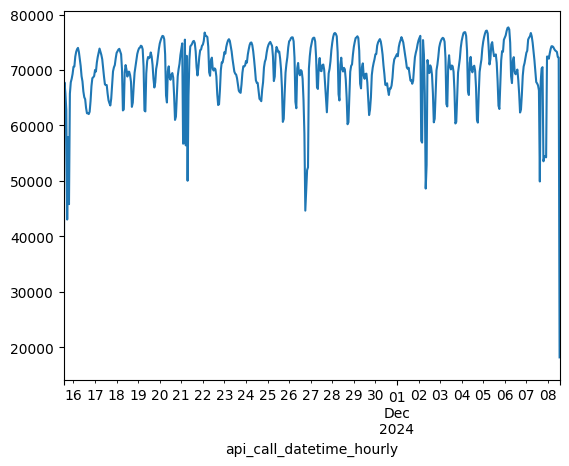

In [40]:
aggregated_df["num_bikes_available"].plot()

In [41]:
first_arima = aggregated_df["num_bikes_available"]

In [43]:
print('p-value: ', adfuller(first_arima)[1])

p-value:  1.1105718076906997e-11


p -value lower than 5 % so no differentiation 

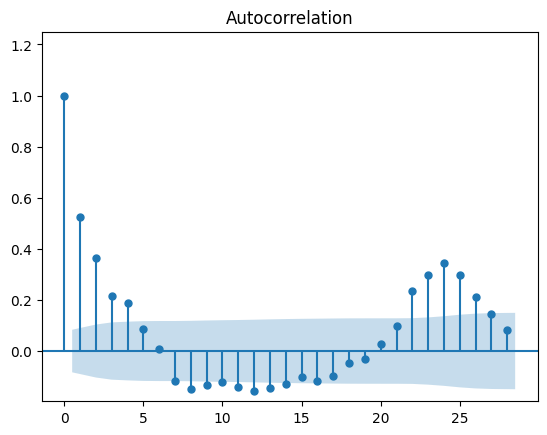

In [44]:
plot_acf(first_arima, auto_ylims=True);

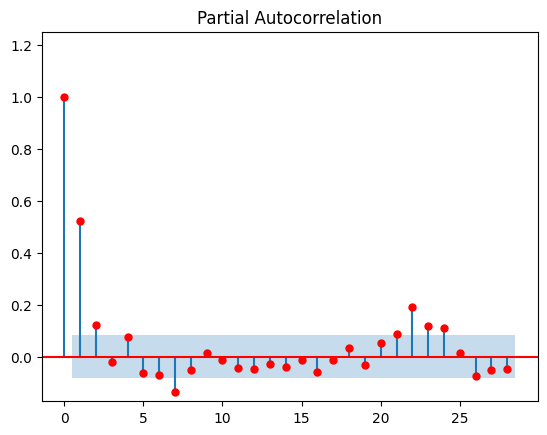

In [45]:
plot_pacf(first_arima, method='ywm', auto_ylims=True, c='r');

In [46]:
y_train = first_arima[:387]
y_test = first_arima[387:]
arima = ARIMA(y_train, order=(3,0,1), trend='t').fit()

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeliho

In [47]:
print(arima.summary())


                                SARIMAX Results                                
Dep. Variable:     num_bikes_available   No. Observations:                  387
Model:                  ARIMA(3, 0, 1)   Log Likelihood               -3795.668
Date:                 Thu, 16 Jan 2025   AIC                           7603.336
Time:                         00:49:26   BIC                           7627.087
Sample:                     11-15-2024   HQIC                          7612.754
                          - 12-01-2024                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            72.8972    218.806      0.333      0.739    -355.954     501.748
ar.L1          0.1043      0.057      1.825      0.068      -0.008       0.216
ar.L2          0.8993      0.030     29.727 

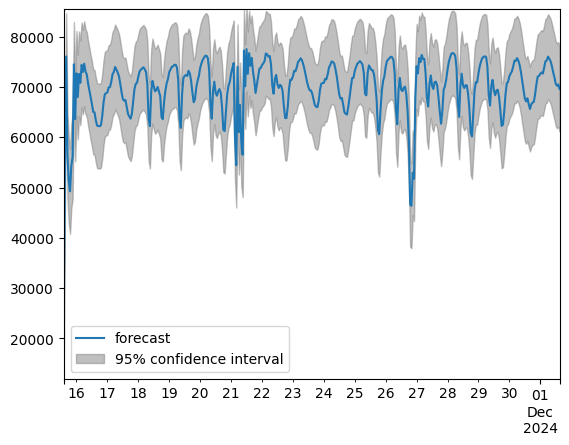

In [48]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(arima, start=1, dynamic=False);
plt.ylim((.7 * first_arima.min(), 1.1 * first_arima.max()));

In [55]:
forecast_results = arima.get_forecast(166, alpha=0.05)
forecast = forecast_results.predicted_mean.reset_index(drop=True)
conf_int = pd.DataFrame(forecast_results.conf_int().values, columns=['low', 'high'])

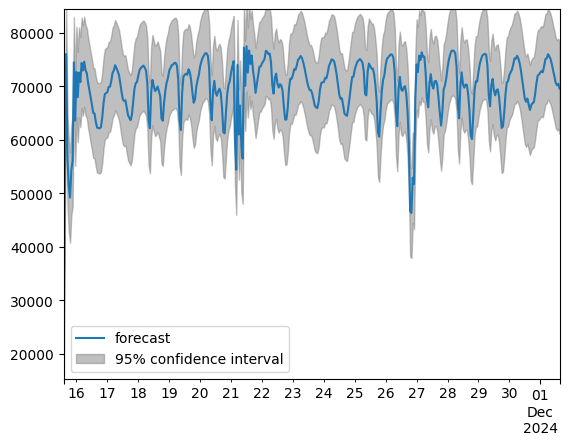

In [56]:
plot_predict(arima, start=1, dynamic=False);
plt.ylim((.9 * y_train.min(), 1.1 * y_train.max()));

In [57]:
conf_int

,low,high
0,59819.467165,76674.387580
1,57325.258672,79154.076903
2,54668.679683,82094.939598
3,52960.203550,83818.880336
4,51055.415350,85981.009739
...,...,...
161,-17490.050485,176890.606393
162,-17716.030060,177259.387191
163,-17941.082866,177627.241319
164,-18165.217305,177994.177204


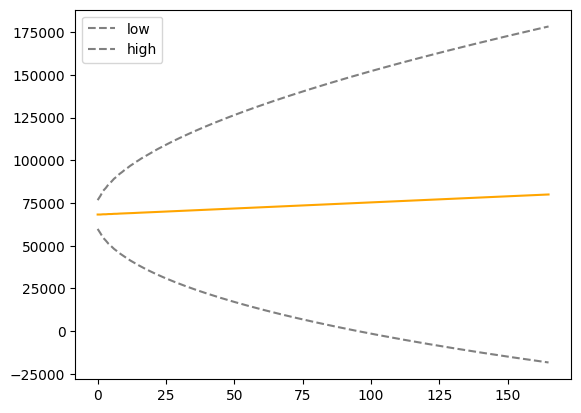

In [58]:
plt.plot(forecast, c='orange')
plt.plot(conf_int['low'], label='low', c='grey', ls='--')
plt.plot(conf_int['high'], label='high', c='grey', ls='--')
plt.legend();

In [59]:
forecast

0      68246.927373
1      68239.667788
2      68381.809640
3      68389.541943
4      68518.212545
           ...     
161    79700.277954
162    79771.678565
163    79843.079226
164    79914.479950
165    79985.880724
Name: predicted_mean, Length: 166, dtype: float64

In [60]:
mse = mean_squared_error(y_test, forecast)
mae = mean_absolute_error(y_test, forecast)
mape = mean_absolute_percentage_error(y_true, y_pred)
     

In [61]:
mse

79086912.179611

In [62]:
mae

5793.756173539875

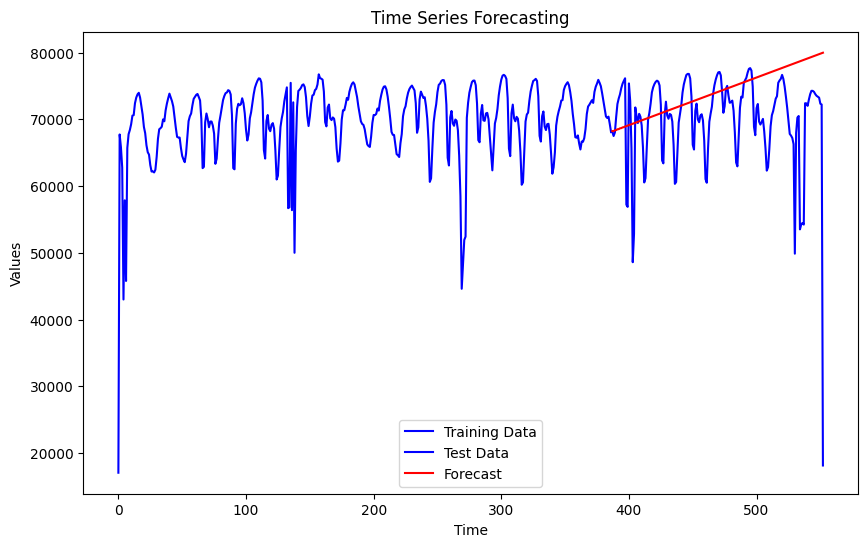

In [63]:
plt.figure(figsize=(10, 6))
# Plot y_train
plt.plot(range(len(y_train)), y_train, label="Training Data", color="blue")
# Plot y_test
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label="Test Data", color="blue")
# Plot forecast
plt.plot(range(len(y_train), len(y_train) + len(forecast)), forecast, label="Forecast", color="red")

# Add labels and legend
plt.title("Time Series Forecasting")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()

In [112]:
import pmdarima as pm

model = pm.auto_arima(
    y_train, 
    start_p=0, max_p=3,
    start_q=0, max_q=3, 
    d=None,           # let model determine 'd'
    test='adf',       # using adf test to find optimal 'd'
    trace=True, error_action='ignore',  suppress_warnings=True
)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4937.874, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4138.314, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4536.301, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5423.988, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4027.048, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4006.162, Time=0.25 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3977.622, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3979.475, Time=0.27 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3977.866, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4047.221, Time=0.13 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0] intercept
Total fit time: 2.705 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  400
M

In [113]:
forecast

0      154.320457
1      163.541571
2      176.813957
3      192.676381
4      209.841197
          ...    
148    375.498326
149    376.182295
150    376.866264
151    377.550234
152    378.234203
Name: predicted_mean, Length: 153, dtype: float64

# Sarima

In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Additive Decomposition (y = Trend + Seasonal + Residuals)
result_add = seasonal_decompose(y_train, model='additive')#or multiplicative 
result_mul = seasonal_decompose(y_train, model='multiplicative')#or multiplicative 


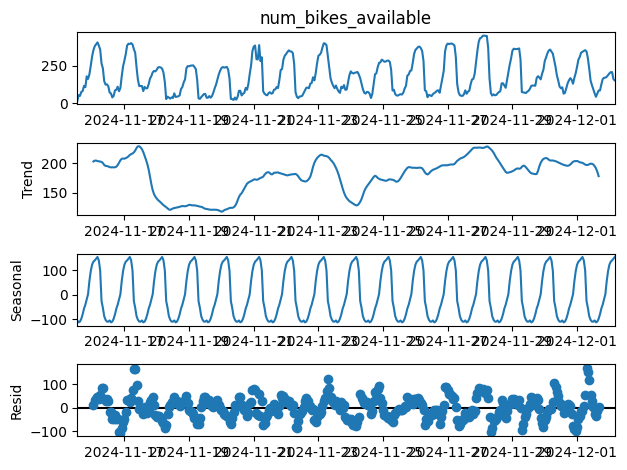

In [115]:
result_add.plot();

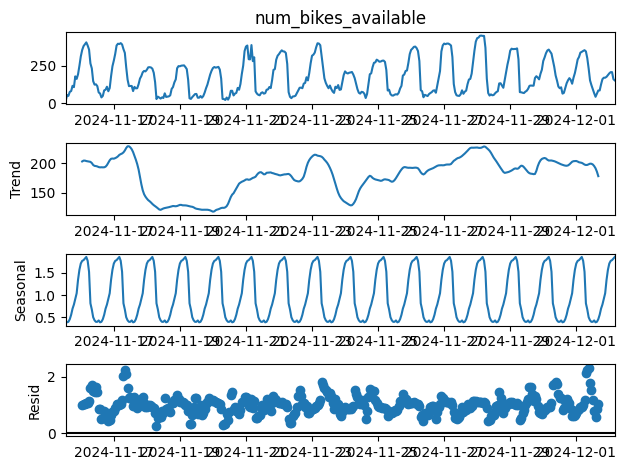

In [116]:
result_mul.plot();

In [117]:
df_deseson_add = (y_train - result_add.seasonal)

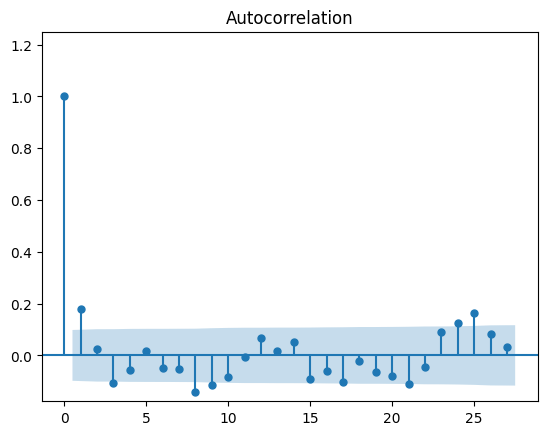

In [118]:
plot_acf(df_deseson_add.diff(1).dropna(), auto_ylims=True);

In [119]:
import numpy as np

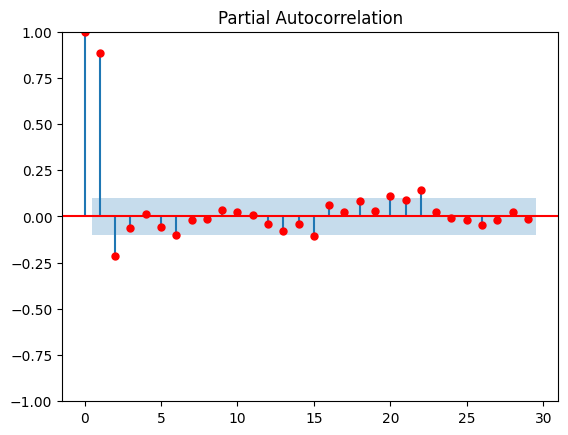

In [120]:
plot_pacf(df_deseson_add.dropna(),lags=np.arange(30), method='ywm',c='red');

### Step 1: Check Stationarity


diff of d = 1, seasonality of 12 due to a peak in the serie, stationary attained a d = 1, 


In [121]:
from statsmodels.tsa.stattools import adfuller

adfuller(df_deseson_add)[1]

8.08327994563944e-07

The p-value should be less than 0.05 to have a 95% confidence in the stationarity.  

If the p-value is larger than 0.05, we cannot reject the null hypothesis (null hypothesis = "the process is not stationary").

Ideally, p is *much* smaller than 0.05.

Another way to look for stationarity is to look at the autocorrelation function (ACF).

Plot the ACF of the time series. You should see a large peak at lag 12, indicating strong yearly seasonality.

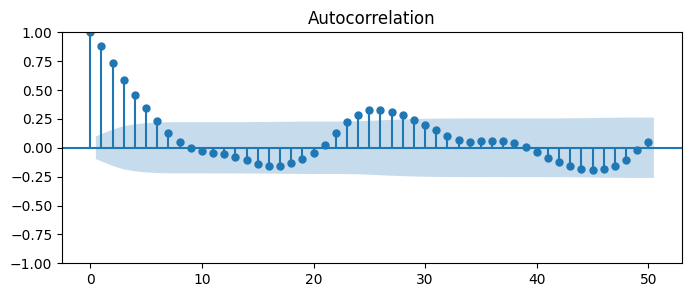

In [122]:
fig, ax = plt.subplots(1,1, figsize=(8,3))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_deseson_add, lags=50, ax=ax)
plt.show()

### Step 2 - Seasonal Differencing (D)


In [123]:
adfuller(df_deseson_add.diff(6).dropna())[1]

2.708541190450597e-15

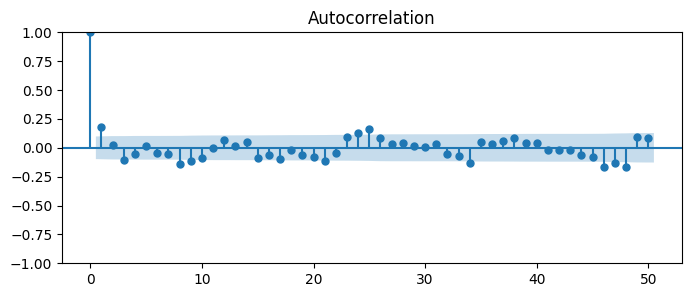

In [124]:
fig, ax = plt.subplots(1,1, figsize=(8,3))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_deseson_add.diff(1).dropna(), lags=50, ax=ax)
plt.show()

#### Differencing small d 

In [125]:
adfuller(df_deseson_add.diff(12).diff(1).dropna())[1]

1.553074085810052e-22

#### Step 4 - Select AR(p, P) and MA(q, Q) Terms

You will now use the ACF and PACF plots to decide whether to include an AR term(s), MA term(s), or both.

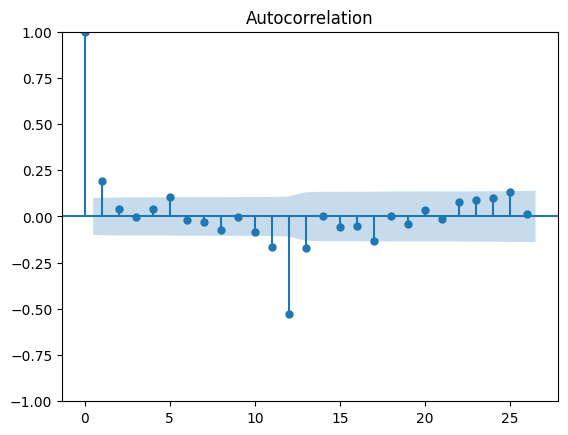

In [126]:
plot_acf(df_deseson_add.diff(12).diff(1).dropna());

#### Partial Auto correlation 

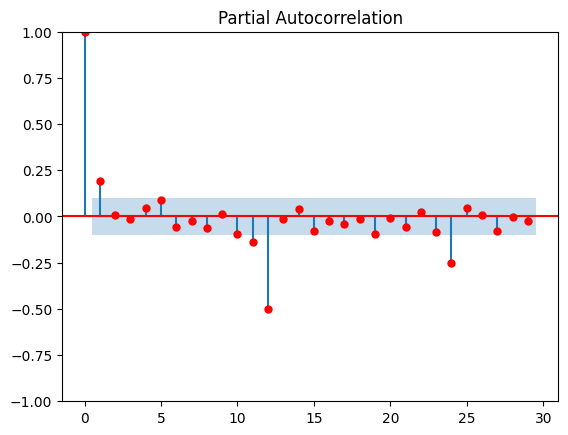

In [127]:
plot_pacf(df_deseson_add.diff(12).diff().dropna(),lags=np.arange(30), method='ywm',c='red');

In [128]:
import pmdarima as pm
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [130]:
# Define SARIMA model with seasonality
model = SARIMAX(
    df_deseson_add,
    order=(1, 0, 2),         # Non-seasonal ARIMA (p, d, q)
    seasonal_order=(2, 1, 0, 24),  # Seasonal ARIMA (P, D, Q, m with m=24 for seasonality)
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the SARIMA model
model_fit = model.fit(disp=False)

# Print model summary
print(model_fit.summary())


/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  400
Model:             SARIMAX(1, 0, 2)x(2, 1, [], 24)   Log Likelihood               -1583.545
Date:                             Wed, 15 Jan 2025   AIC                           3179.090
Time:                                     15:20:21   BIC                           3201.830
Sample:                                 11-15-2024   HQIC                          3188.164
                                      - 12-02-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7956      0.042     18.938      0.000       0.713       0.878
ma.L1          0.2189      

In [131]:
# Predict on the training data
train_pred = model_fit.predict(start=df_deseson_add.index[0], end=df_deseson_add.index[-1])

# Forecast on the test data
test_pred = model_fit.get_forecast(steps=len(y_test))

# Extract predicted mean and confidence intervals
test_pred_mean = test_pred.predicted_mean
test_pred_ci = test_pred.conf_int()


In [132]:
# Calculate RMSE for train and test
train_rmse = (mean_squared_error(df_deseson_add, train_pred))
test_rmse = (mean_squared_error(y_test, test_pred_mean))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")


Train RMSE: 1440.124928387474
Test RMSE: 28455.00323452514


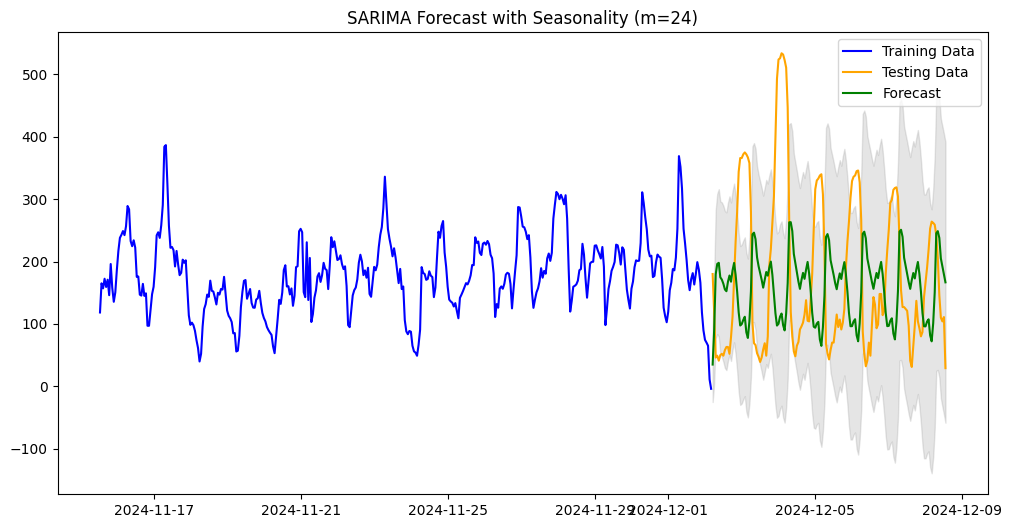

In [133]:
# Plot training predictions, test predictions, and confidence intervals
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(df_deseson_add, label='Training Data', color='blue')

# Plot testing data
plt.plot(y_test, label='Testing Data', color='orange')

# Plot predicted values
plt.plot(y_test.index, test_pred_mean, label='Forecast', color='green')

# Add confidence intervals
plt.fill_between(
    y_test.index, 
    test_pred_ci.iloc[:, 0], 
    test_pred_ci.iloc[:, 1], 
    color='gray', 
    alpha=0.2
)

plt.legend()
plt.title('SARIMA Forecast with Seasonality (m=24)')
plt.show()


In [76]:
#smodel = pm.auto_arima(df_deseson_add, seasonal=True, m=24, d=0, 
                       #start_p=0, max_p=2, start_q=0, max_q=2,
                       #start_P=0, max_P=2,start_Q=0, max_Q=2,D=1, 
                       #trace=True, error_action='ignore', suppress_warnings=True)

In [ ]:
smodel.predict(n_periods=len(y_test),return_conf_int=True,alpha=0.01)

In [ ]:
n_periods = len(y_test)
central, conf_int = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_y_test = y_test.index #pd.date_range(df_test.index[-1], periods = n_periods, freq='MS')

# Make series for plotting purpose
central = pd.Series(central, index=index_y_test)
lower = pd.Series(conf_int[:, 0], index=index_y_test)
upper = pd.Series(conf_int[:, 1], index=index_y_test)

In [ ]:
# Plot
plt.figure(figsize=(12, 5), dpi=100)

plt.plot(y_train, label = "train values")
plt.plot(y_test, label = "true test values")
plt.plot(central, color='darkgreen',label = "forecast")

plt.fill_between(
    lower.index, 
    lower, 
    upper, 
    color='k', alpha=.15
)

plt.title("SARIMA Forecast")
plt.legend()
plt.show()

In [ ]:
first_arima.head(48).plot();

In [ ]:
mse = mean_squared_error(y_test, central, conf_int = smodel.predict(n_periods=n_periods, return_conf_int=True))
mae = mean_absolute_error(y_test, central, conf_int = smodel.predict(n_periods=n_periods, return_conf_int=True))

## Sarimax exogoneous data 

In [135]:
aggregated_df["% velib bleu"] = aggregated_df["num_bikes_available_ebike"]/aggregated_df["num_bikes_available"]

In [136]:
aggregated_df["% velib bleu"]

api_call_datetime_hourly
2024-11-15 13:00:00    0.642857
2024-11-15 14:00:00    0.716981
2024-11-15 15:00:00    0.687500
2024-11-15 16:00:00    0.613333
2024-11-15 17:00:00    0.537500
                         ...   
2024-12-08 09:00:00    0.678082
2024-12-08 10:00:00    0.700000
2024-12-08 11:00:00    0.625000
2024-12-08 12:00:00    0.603604
2024-12-08 13:00:00    0.586207
Name: % velib bleu, Length: 553, dtype: float64

In [137]:
y_train_sarimax = aggregated_df[:400][["% velib bleu","is_week_end"]]
y_test_sarimax = aggregated_df[400:][["% velib bleu","is_week_end"]]
y_train_sarimax

,% velib bleu,is_week_end
api_call_datetime_hourly,,
2024-11-15 13:00:00,0.642857,0
2024-11-15 14:00:00,0.716981,0
2024-11-15 15:00:00,0.687500,0
2024-11-15 16:00:00,0.613333,0
2024-11-15 17:00:00,0.537500,0
...,...,...
2024-12-02 00:00:00,0.681818,0
2024-12-02 01:00:00,0.674757,0
2024-12-02 02:00:00,0.689320,0


In [138]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
from sklearn.metrics import mean_squared_error
import itertools

# Define ranges for p, d, q, P, D, Q
p = range(0, 4)  # AR terms
d = range(0,3)  # Differencing
q = range(0, 4)  # MA terms
P = range(0, 4)  # Seasonal AR terms
D = range(0, 3)  # Seasonal differencing
Q = range(0, 4)  # Seasonal MA terms
m = [24,12,16,4,6,1]         # Seasonality (24 for daily data with hourly seasonality)

# Create a list of all possible combinations of parameters
param_combinations = list(itertools.product(p, d, q, P, D, Q, m))

# Grid search for the best parameters
best_aic = float('inf')
best_params = None

for params in param_combinations:
    try:
        # Define the SARIMAX model
        model = SARIMAX(
            new_sarimax_train,
            exog=sarimax_train_exo,
            order=(params[0], params[1], params[2]),
            seasonal_order=(params[3], params[4], params[5], params[6]),
            enforce_stationarity=False,
            enforce_invertibility=False, freq="H"
        )
        
        # Fit the model
        model_fit = model.fit(disp=False)
        
        # Check the AIC (lower is better)
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_params = params
    except:
        continue

print(f"Best SARIMAX parameters: {best_params} with AIC: {best_aic}")


/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  se

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  se

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeliho

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  se

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  se

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  se

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  se

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

In [ ]:
best_params, best_aic

In [140]:
# Define the SARIMAX model
model = SARIMAX(
    df_deseson_add,
    exog=y_train_sarimax,  # Include exogenous variables if applicable; set to None if no exogenous variables
    order=(1, 1, 2),           # Non-seasonal ARIMA (p, d, q)
    seasonal_order=(2, 1, 2, 24),  # Seasonal ARIMA (P, D, Q, m with m=24)
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model
model_fit = model.fit(disp=False)

# Print model summary
print(model_fit.summary())


/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  400
Model:             SARIMAX(1, 1, 2)x(2, 1, 2, 24)   Log Likelihood               -1541.666
Date:                            Tue, 14 Jan 2025   AIC                           3103.333
Time:                                    16:44:43   BIC                           3141.140
Sample:                                11-15-2024   HQIC                          3118.423
                                     - 12-02-2024                                         
Covariance Type:                              opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
% velib bleu   -30.5043     22.939     -1.330      0.184     -75.464      14.455
is_week_end     21.6599     2

In [141]:
# Predict on the training data
train_pred = model_fit.predict(start=df_deseson_add.index[0], end=df_deseson_add.index[-1], exog=y_train_sarimax)

# Forecast on the test data
test_pred = model_fit.get_forecast(steps=len(y_test), exog=y_test_sarimax)

# Extract predicted mean and confidence intervals
test_pred_mean = test_pred.predicted_mean
test_pred_ci = test_pred.conf_int()


In [142]:
# Evaluate on training set
train_mse = mean_squared_error(df_deseson_add, train_pred)
train_mae = mean_absolute_error(df_deseson_add, train_pred)

# Evaluate on test set
test_mse = mean_squared_error(y_test, test_pred_mean)
test_mae = mean_absolute_error(y_test, test_pred_mean)

print(f"Train MSE: {train_mse:.2f}, Train MAE: {train_mae:.2f}")
print(f"Test MSE: {test_mse:.2f}, Test MAE: {test_mae:.2f}")


Train MSE: 1020.90, Train MAE: 22.77
Test MSE: 17367.90, Test MAE: 108.56


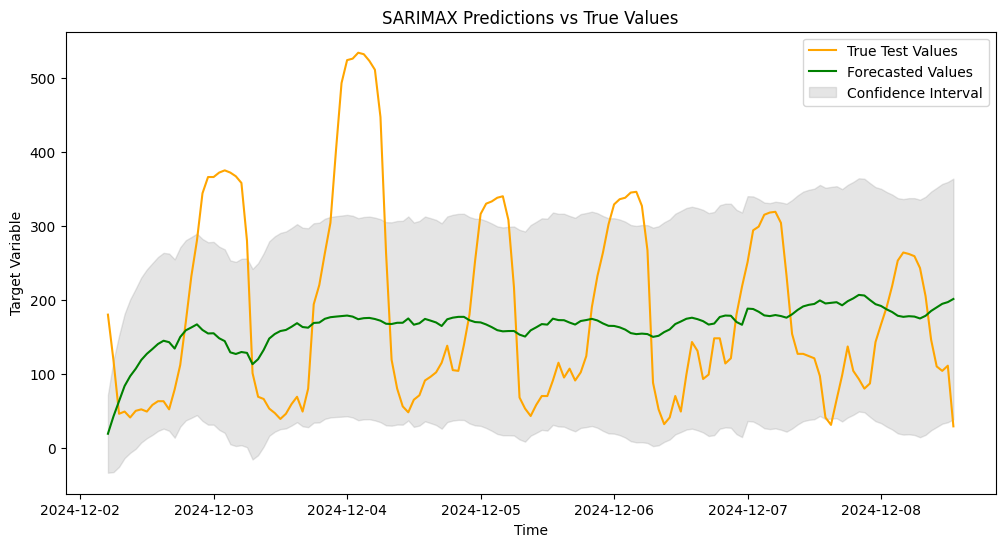

In [143]:
plt.figure(figsize=(12, 6))

# Plot true values
plt.plot(y_test, label='True Test Values', color='orange')

# Plot predicted values
plt.plot(test_pred_mean, label='Forecasted Values', color='green')

# Add confidence intervals
plt.fill_between(
    y_test.index,
    test_pred_ci.iloc[:, 0],  # Lower bound
    test_pred_ci.iloc[:, 1],  # Upper bound
    color='gray',
    alpha=0.2,
    label='Confidence Interval'
)

plt.title('SARIMAX Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.legend()
plt.show()


In [94]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define a simpler SARIMA model
model = SARIMAX(
    df_deseson_add,
    exog=y_train_sarimax,  # Include if you have exogenous variables
    order=(1, 1, 1),           # Simpler non-seasonal (p, d, q)
    seasonal_order=(1, 1, 1, 24),  # Simpler seasonal (P, D, Q, m)
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model
model_fit = model.fit(disp=False)

# Evaluate on test set
test_pred = model_fit.get_forecast(steps=len(y_test), exog=y_test_sarimax)
test_pred_mean = test_pred.predicted_mean

# Calculate MAE and MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
test_mae = mean_absolute_error(y_test, test_pred_mean)
test_mse = mean_squared_error(y_test, test_pred_mean)

print(f"Test MAE: {test_mae}, Test MSE: {test_mse}")


/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/alexlesaux/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Test MAE: 107.3680950775874, Test MSE: 17245.584123079156


In [103]:
df_deseson_add

api_call_datetime_hourly
2024-11-15 13:00:00    118.319600
2024-11-15 14:00:00    165.090433
2024-11-15 15:00:00    156.938090
2024-11-15 16:00:00    172.431579
2024-11-15 17:00:00    159.174895
                          ...    
2024-12-02 00:00:00     74.461006
2024-12-02 01:00:00     69.984965
2024-12-02 02:00:00     64.975850
2024-12-02 03:00:00     10.918558
2024-12-02 04:00:00     -4.112692
Length: 400, dtype: float64

In [139]:
df_3 =  pd.read_csv("bikes_weather.csv")

In [138]:
best_params

(1, 1, 2, 2, 1, 2, 24)

In [140]:
df_3

,num_bikes_available,num_docks_available,temp,feelslike,precip,snow,windgust,hour_of_week_sin,hour_of_week_cos,station_id_scaled
0,13,22,51.0,51.0,0.0,0.0,8.7,-0.826239,-0.563320,0.114416
1,5,15,51.0,51.0,0.0,0.0,8.7,-0.826239,-0.563320,0.191932
2,3,18,51.0,51.0,0.0,0.0,8.7,-0.826239,-0.563320,0.059194
3,2,17,51.0,51.0,0.0,0.0,8.7,-0.826239,-0.563320,0.104613
4,26,34,51.0,51.0,0.0,0.0,8.7,-0.826239,-0.563320,0.332541
...,...,...,...,...,...,...,...,...,...,...
756176,43,2,46.4,39.8,0.0,0.0,39.4,-0.399892,0.916562,0.372832
756177,13,2,46.4,39.8,0.0,0.0,39.4,-0.399892,0.916562,0.187855
756178,45,21,46.4,39.8,0.0,0.0,39.4,-0.399892,0.916562,0.690102
756179,23,1,46.4,39.8,0.0,0.0,39.4,-0.399892,0.916562,0.486817


In [141]:
df_2 = pd.read_csv("Paris_weather_data.csv")

In [142]:
df_2

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,paris,2024-11-15T00:00:00,50.7,50.7,48.0,90.29,0.000,0,NaN,0.0,...,1029.5,99.0,6.3,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
1,paris,2024-11-15T01:00:00,50.7,50.7,47.1,87.44,0.000,0,NaN,0.0,...,1029.3,99.0,6.8,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
2,paris,2024-11-15T02:00:00,50.3,50.3,46.6,87.19,0.000,0,NaN,0.0,...,1028.9,99.0,9.3,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
3,paris,2024-11-15T03:00:00,50.0,47.4,46.1,86.50,0.000,0,NaN,0.0,...,1028.9,99.0,10.6,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
4,paris,2024-11-15T04:00:00,49.2,47.2,43.7,81.35,0.000,0,NaN,0.0,...,1028.6,99.0,13.4,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,paris,2024-12-08T19:00:00,44.9,38.5,42.5,91.06,0.003,100,rain,0.0,...,1012.1,97.6,6.6,0,0.0,0,NaN,"Rain, Overcast",rain,"07149099999,07156099999,07146099999,0715709999..."
572,paris,2024-12-08T20:00:00,44.9,39.3,42.8,92.03,0.000,0,NaN,0.0,...,1013.3,100.0,4.8,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
573,paris,2024-12-08T21:00:00,44.9,39.0,42.4,90.67,0.000,0,NaN,0.0,...,1014.4,95.5,7.7,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."
574,paris,2024-12-08T22:00:00,44.2,38.1,41.2,89.43,0.000,0,NaN,0.0,...,1015.6,100.0,8.3,0,0.0,0,NaN,Overcast,cloudy,"07149099999,07156099999,07146099999,0715709999..."


In [143]:
df_2["solarenergy"].value_counts()

0.0    418
0.1     93
0.2     46
0.3     13
0.4      5
0.5      1
Name: solarenergy, dtype: int64

In [158]:
df

,stationCode,station_id,num_bikes_available,num_bikes_available_mechanical,num_bikes_available_ebike,num_docks_available,is_installed,is_returning,is_renting,last_reported,api_calltime
0,NaN,213688169,14,NaN,NaN,21,1,1,1,1731677115,1731677400
1,NaN,17278902806,4,NaN,NaN,16,1,1,1,1731677359,1731677400
2,NaN,36255,3,NaN,NaN,18,1,1,1,1731677171,1731677400
3,NaN,251039991,8,NaN,NaN,17,1,1,1,1731677193,1731677400
4,NaN,85002689,25,NaN,NaN,35,1,1,1,1731677275,1731677400
...,...,...,...,...,...,...,...,...,...,...,...
3277714,4010.0,476155906,43,33.0,10.0,2,1,1,1,1733661079,1733662801
3277715,4005.0,516395829,13,0.0,13.0,2,1,1,1,1733660920,1733662801
3277716,8004.0,315022587,45,30.0,15.0,21,1,1,1,1733661023,1733662801
3277717,42004.0,368766689,23,11.0,12.0,1,1,1,1,1733661029,1733662801


In [144]:
# Convert the datetime column in the first dataset to datetime if not already
df_2['datetime'] = pd.to_datetime(df_2['datetime'])
df_2.set_index('datetime', inplace=True)

# Ensure the second dataset has datetime as the index
df_deseson_add.index = pd.to_datetime(df_deseson_add.index)

# Check for timezone consistency (if applicable)
print(df_2.index.tz, df_deseson_add.index.tz)


None None


In [157]:
len(df["station_id"].unique())

1488

In [147]:
# Merge the datasets on datetime
merged_df_train = pd.DataFrame(df_deseson_add,columns=["velo"]).merge(df_2[['precip', 'temp', 'snow', 'feelslike', 'windgust']], 
                            how='left', 
                            left_index=True, 
                            right_index=True)

# Check the result
print(merged_df_train.head())


                                velo  precip  temp  snow  feelslike  windgust
api_call_datetime_hourly                                                     
2024-11-15 13:00:00       118.319600     0.0  50.6   0.0       50.6       9.8
2024-11-15 14:00:00       165.090433     0.0  51.0   0.0       51.0       8.7
2024-11-15 15:00:00       156.938090     0.0  50.7   0.0       50.7      10.4
2024-11-15 16:00:00       172.431579     0.0  49.9   0.0       49.9       8.3
2024-11-15 17:00:00       159.174895     0.0  49.1   0.0       49.1       7.2


In [148]:
merged_df_train.columns

Index(['velo', 'precip', 'temp', 'snow', 'feelslike', 'windgust'], dtype='object')

In [135]:
new_sarimax_train = merged_df_train["velo"]
new_exo_train = merged_df_train.drop("velo",axis=1)

In [136]:
sarimax_train_exo = new_exo_train.merge(y_train_sarimax, left_index=True, right_index=True)

In [152]:
import seaborn as sns

<AxesSubplot:>

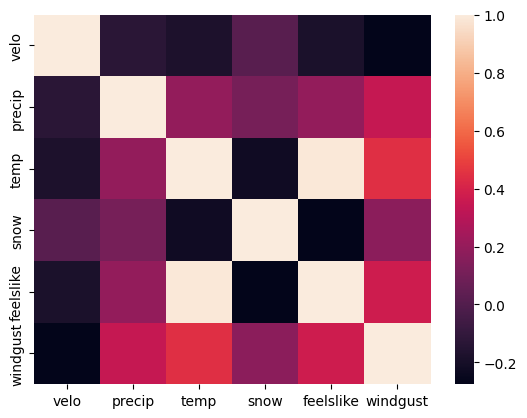

In [153]:
sns.heatmap(merged_df_train.corr())

In [118]:
len(merged_df)

400

## Model With one time series  

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('p-value: ', adfuller(hourly_data_15112)[1])

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(hourly_data_15112, auto_ylims=True);


In [ ]:
print('p-value: ', adfuller(hourly_data_15112.diff(1).fillna(0))[1])

In [ ]:
hourly_data_15112.diff(1).fillna(0).plot()

In [ ]:
plot_acf(hourly_data_15112.diff().dropna(), auto_ylims=True);

## AR and MA (p and q) 

q = 5 

In [ ]:
plot_pacf(hourly_data_15112, method='ywm', auto_ylims=True, c='r');

p = 1

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# 1. initialize the model
arima = ARIMA(hourly_data_15112, order=(1, 0, 3), trend='t')

# 2. fit the models
arima = arima.fit()

arima.summary()

In [ ]:
plt.plot(forecast, c='orange')
plt.plot(conf_int['low'], label='low', c='grey', ls='--')
plt.plot(conf_int['high'], label='high', c='grey', ls='--')
plt.legend();

In [ ]:
forecast.index = y_test.index
conf_int.index = y_test.index

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(forecast, c='orange')
plt.plot(conf_int['low'], label='low', c='orange', ls='--')
plt.plot(conf_int['high'], label='high', c='orange', ls='--')
plt.plot(y_train, c='blue')
plt.plot(y_test, c='blue')

plt.legend()
plt.fill_between(y_test.index, conf_int['low'], conf_int['high'], color='k', alpha=.15);

In [ ]:
hourly_data_15112

In [ ]:
residuals = pd.DataFrame(arima.resid)
residuals.plot(title="Residuals");

In [ ]:
residuals.plot(kind='kde', title='Residual density');

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

for p in range(0, 4):
    for q in range(0, 4):
        try:
            model = ARIMA(y_train, order=(p, 1, q)).fit()
            print(f"Model ({p}, 1, {q}) - AIC: {model.aic}")
        except:
            print(f"Model ({p}, 1, {q}) failed.")


# Prophet 

<AxesSubplot:xlabel='api_call_datetime_hourly'>

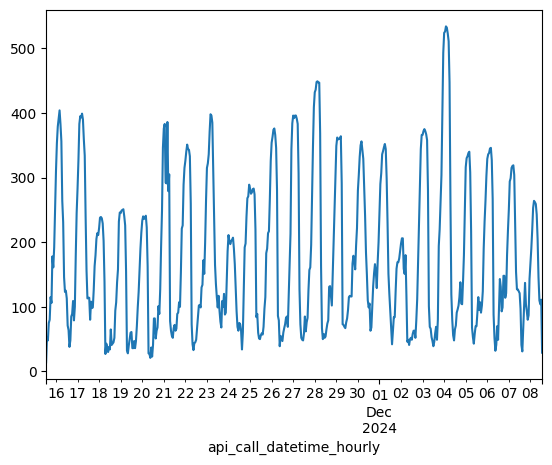

In [160]:
first_arima.plot()

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [172]:
prophet_format = pd.DataFrame(first_arima).reset_index()

In [173]:
prophet_format

,api_call_datetime_hourly,num_bikes_available
0,2024-11-15 13:00:00,14
1,2024-11-15 14:00:00,53
2,2024-11-15 15:00:00,48
3,2024-11-15 16:00:00,75
4,2024-11-15 17:00:00,80
...,...,...
548,2024-12-08 09:00:00,146
549,2024-12-08 10:00:00,110
550,2024-12-08 11:00:00,104
551,2024-12-08 12:00:00,111


In [234]:
553 - 387


166

In [233]:
df_train.shape

(387, 2)

In [174]:
prophet_format.columns = ["ds","y"]

In [206]:
prophet = Prophet(seasonality_mode='additive')


In [207]:
train_size = 0.7
index = round(train_size*prophet_format.shape[0])

df_train = prophet_format.iloc[:index]
df_test = prophet_format.iloc[index:]

In [208]:
prophet.fit(df_train)

16:40:20 - cmdstanpy - INFO - Chain [1] start processing
16:40:20 - cmdstanpy - INFO - Chain [1] done processing


In [235]:
future = prophet.make_future_dataframe(periods=166,freq="H")

In [236]:
forecast = prophet.predict(future)

In [237]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-11-15 13:00:00,160.700692,-15.562974,126.800211,160.700692,160.700692,-106.508117,-106.508117,-106.508117,-110.000777,-110.000777,-110.000777,3.492660,3.492660,3.492660,0.0,0.0,0.0,54.192575
1,2024-11-15 14:00:00,160.764754,-22.198106,118.693716,160.764754,160.764754,-112.643272,-112.643272,-112.643272,-117.004845,-117.004845,-117.004845,4.361573,4.361573,4.361573,0.0,0.0,0.0,48.121482
2,2024-11-15 15:00:00,160.828816,-20.626673,125.473910,160.828816,160.828816,-106.864092,-106.864092,-106.864092,-112.172871,-112.172871,-112.172871,5.308780,5.308780,5.308780,0.0,0.0,0.0,53.964725
3,2024-11-15 16:00:00,160.892878,1.133239,143.892239,160.892878,160.892878,-88.599858,-88.599858,-88.599858,-94.923449,-94.923449,-94.923449,6.323590,6.323590,6.323590,0.0,0.0,0.0,72.293020
4,2024-11-15 17:00:00,160.956940,22.006690,166.213923,160.956940,160.956940,-66.948235,-66.948235,-66.948235,-74.342782,-74.342782,-74.342782,7.394547,7.394547,7.394547,0.0,0.0,0.0,94.008705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,2024-12-08 09:00:00,220.808160,59.355726,199.084241,219.455926,222.030210,-93.362718,-93.362718,-93.362718,-95.928751,-95.928751,-95.928751,2.566034,2.566034,2.566034,0.0,0.0,0.0,127.445442
549,2024-12-08 10:00:00,220.931639,41.502111,186.710712,219.572998,222.170281,-103.921659,-103.921659,-103.921659,-105.335234,-105.335234,-105.335234,1.413576,1.413576,1.413576,0.0,0.0,0.0,117.009980
550,2024-12-08 11:00:00,221.055118,46.841445,192.260877,219.695905,222.306152,-101.297582,-101.297582,-101.297582,-101.603723,-101.603723,-101.603723,0.306141,0.306141,0.306141,0.0,0.0,0.0,119.757536
551,2024-12-08 12:00:00,221.178597,48.808881,187.472695,219.800015,222.441753,-102.536707,-102.536707,-102.536707,-101.785404,-101.785404,-101.785404,-0.751303,-0.751303,-0.751303,0.0,0.0,0.0,118.641890


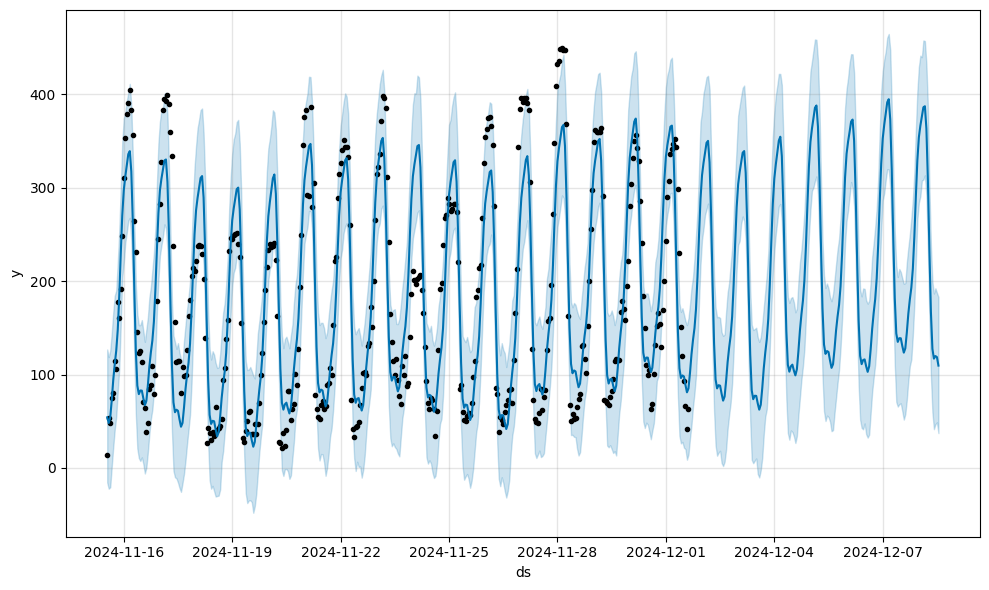

In [238]:
prophet.plot(forecast);

In [213]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

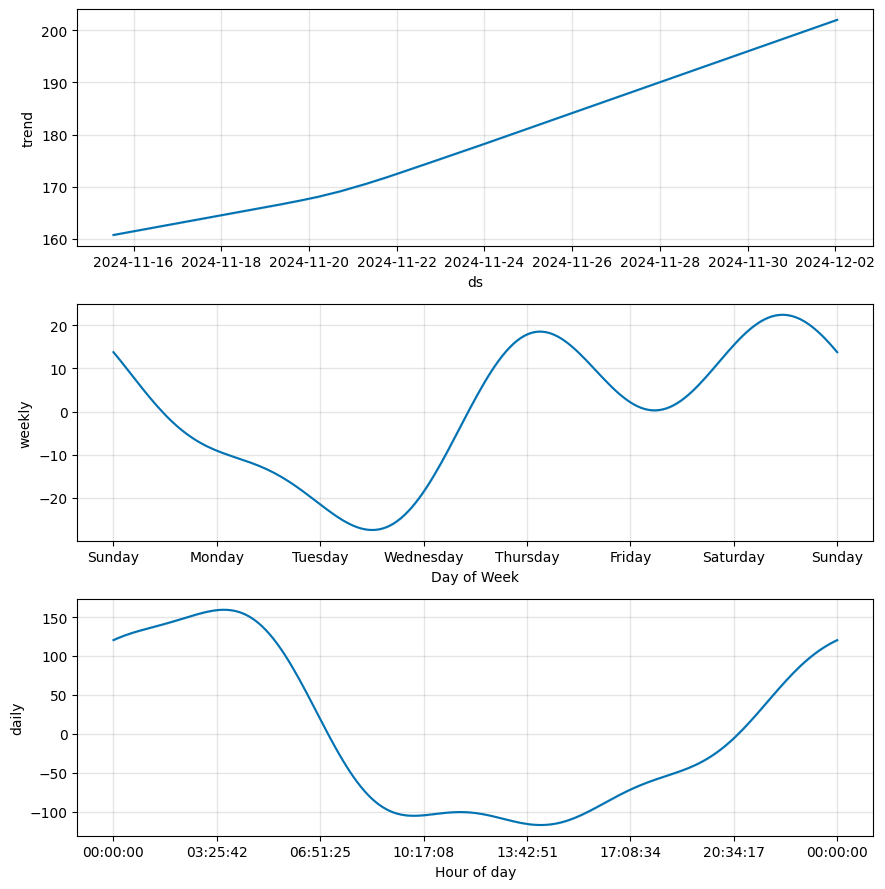

In [214]:
fig = prophet.plot_components(forecast)

In [215]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-11-15 13:00:00,160.700692,-17.170384,119.596841,160.700692,160.700692,-106.508117,-106.508117,-106.508117,-110.000777,-110.000777,-110.000777,3.492660,3.492660,3.492660,0.0,0.0,0.0,54.192575
1,2024-11-15 14:00:00,160.764754,-20.897402,114.952115,160.764754,160.764754,-112.643272,-112.643272,-112.643272,-117.004845,-117.004845,-117.004845,4.361573,4.361573,4.361573,0.0,0.0,0.0,48.121482
2,2024-11-15 15:00:00,160.828816,-19.618109,124.628874,160.828816,160.828816,-106.864092,-106.864092,-106.864092,-112.172871,-112.172871,-112.172871,5.308780,5.308780,5.308780,0.0,0.0,0.0,53.964725
3,2024-11-15 16:00:00,160.892878,-1.178461,136.087469,160.892878,160.892878,-88.599858,-88.599858,-88.599858,-94.923449,-94.923449,-94.923449,6.323590,6.323590,6.323590,0.0,0.0,0.0,72.293020
4,2024-11-15 17:00:00,160.956940,20.335944,163.474989,160.956940,160.956940,-66.948235,-66.948235,-66.948235,-74.342782,-74.342782,-74.342782,7.394547,7.394547,7.394547,0.0,0.0,0.0,94.008705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2024-12-01 21:00:00,201.545422,132.595958,279.676284,201.542679,201.548788,3.300521,3.300521,3.300521,10.985943,10.985943,10.985943,-7.685423,-7.685423,-7.685423,0.0,0.0,0.0,204.845943
393,2024-12-01 22:00:00,201.668901,170.085638,314.852487,201.664646,201.673913,46.942960,46.942960,46.942960,55.127684,55.127684,55.127684,-8.184724,-8.184724,-8.184724,0.0,0.0,0.0,248.611861
394,2024-12-01 23:00:00,201.792380,219.201604,360.199690,201.786102,201.800056,86.182316,86.182316,86.182316,94.824706,94.824706,94.824706,-8.642390,-8.642390,-8.642390,0.0,0.0,0.0,287.974696
395,2024-12-02 00:00:00,201.915859,244.250052,390.219603,201.907206,201.925711,111.316890,111.316890,111.316890,120.380784,120.380784,120.380784,-9.063894,-9.063894,-9.063894,0.0,0.0,0.0,313.232750


In [216]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming `df` is your original dataset with actual values
# And `model` is your trained Prophet model

# Generate the forecast
future = prophet.make_future_dataframe(periods=len(df_test))  # Adjust to your test set size
forecast = prophet.predict(future)

# Merge actual values (real data) with forecasted values
results = prophet_format.merge(forecast[['ds', 'yhat']], on='ds', how='inner')

In [223]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-11-15 13:00:00,160.700692,-17.362121,121.930191,160.700692,160.700692,-106.508117,-106.508117,-106.508117,-110.000777,-110.000777,-110.000777,3.492660,3.492660,3.492660,0.0,0.0,0.0,54.192575
1,2024-11-15 14:00:00,160.764754,-23.187420,121.530473,160.764754,160.764754,-112.643272,-112.643272,-112.643272,-117.004845,-117.004845,-117.004845,4.361573,4.361573,4.361573,0.0,0.0,0.0,48.121482
2,2024-11-15 15:00:00,160.828816,-17.482020,125.204459,160.828816,160.828816,-106.864092,-106.864092,-106.864092,-112.172871,-112.172871,-112.172871,5.308780,5.308780,5.308780,0.0,0.0,0.0,53.964725
3,2024-11-15 16:00:00,160.892878,3.552686,146.828220,160.892878,160.892878,-88.599858,-88.599858,-88.599858,-94.923449,-94.923449,-94.923449,6.323590,6.323590,6.323590,0.0,0.0,0.0,72.293020
4,2024-11-15 17:00:00,160.956940,19.219086,163.998084,160.956940,160.956940,-66.948235,-66.948235,-66.948235,-74.342782,-74.342782,-74.342782,7.394547,7.394547,7.394547,0.0,0.0,0.0,94.008705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,2025-05-12 15:00:00,680.891236,407.439042,685.022444,558.848046,793.354221,-127.315273,-127.315273,-127.315273,-112.172871,-112.172871,-112.172871,-15.142402,-15.142402,-15.142402,0.0,0.0,0.0,553.575963
549,2025-05-13 15:00:00,683.854734,388.378119,678.896866,560.488695,797.224036,-139.073798,-139.073798,-139.073798,-112.172871,-112.172871,-112.172871,-26.900927,-26.900927,-26.900927,0.0,0.0,0.0,544.780936
550,2025-05-14 15:00:00,686.818232,434.636485,725.437151,561.850741,801.152068,-103.978736,-103.978736,-103.978736,-112.172871,-112.172871,-112.172871,8.194135,8.194135,8.194135,0.0,0.0,0.0,582.839496
551,2025-05-15 15:00:00,689.781730,436.820063,728.965640,563.594622,805.522027,-101.624720,-101.624720,-101.624720,-112.172871,-112.172871,-112.172871,10.548151,10.548151,10.548151,0.0,0.0,0.0,588.157010


In [217]:
# Assuming `results['y']` contains actual values and `results['yhat']` contains forecasted values

# Calculate MAE
mae = mean_absolute_error(results['y'], results['yhat'])
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate MSE
mse = mean_squared_error(results['y'], results['yhat'])
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Absolute Error (MAE): 42.37
Mean Squared Error (MSE): 3090.34


In [218]:
# Calculate RMSE
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 55.59


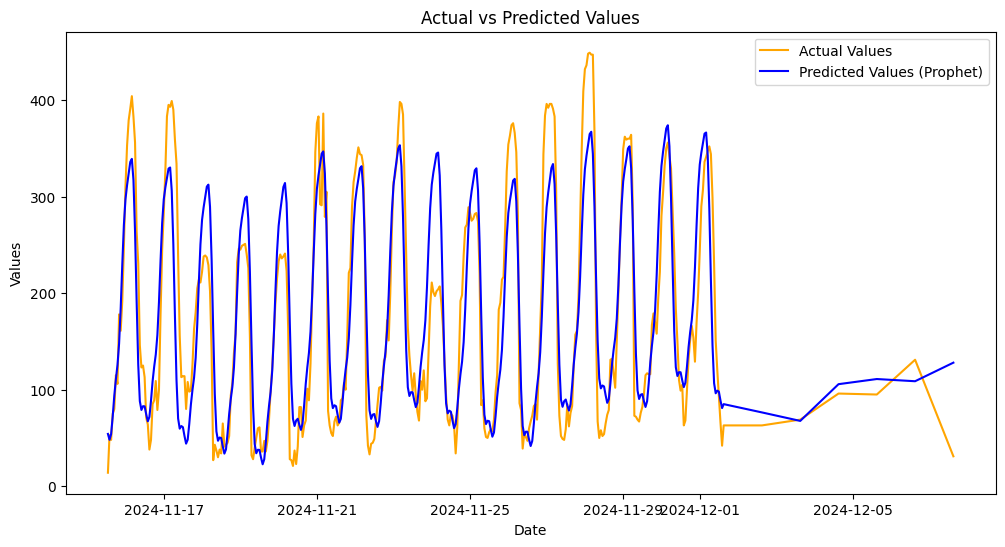

In [219]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results['ds'], results['y'], label='Actual Values', color='orange')
plt.plot(results['ds'], results['yhat'], label='Predicted Values (Prophet)', color='blue')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()


In [225]:
df_test.max()

ds    2024-12-08 13:00:00
y                     534
dtype: object

In [221]:
df_test

,ds,y
387,2024-12-01 16:00:00,84
388,2024-12-01 17:00:00,84
389,2024-12-01 18:00:00,124
390,2024-12-01 19:00:00,159
391,2024-12-01 20:00:00,169
...,...,...
548,2024-12-08 09:00:00,146
549,2024-12-08 10:00:00,110
550,2024-12-08 11:00:00,104
551,2024-12-08 12:00:00,111


In [239]:
# Assuming 'df' contains the actual values with columns ['ds', 'y'] (date and actual values)
# 'forecast' is the output from Prophet's model.predict()

# Merge actual values with forecast
results = prophet_format.merge(forecast[['ds', 'yhat']], on='ds', how='inner')

# Check merged DataFrame
print(results.head())


                   ds   y       yhat
0 2024-11-15 13:00:00  14  54.192575
1 2024-11-15 14:00:00  53  48.121482
2 2024-11-15 15:00:00  48  53.964725
3 2024-11-15 16:00:00  75  72.293020
4 2024-11-15 17:00:00  80  94.008705


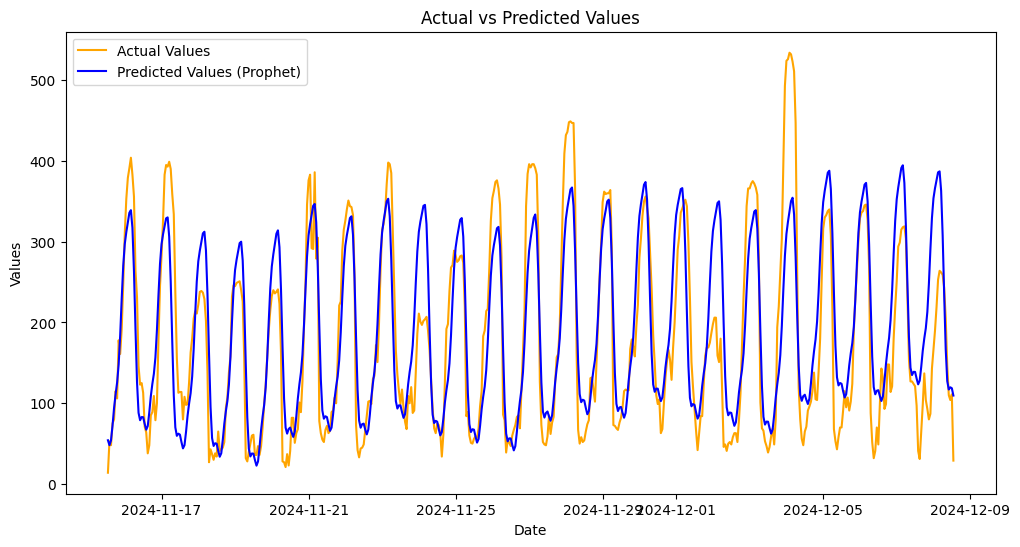

In [240]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(results['ds'], results['y'], label='Actual Values', color='orange')

# Plot predicted (Prophet forecast) values
plt.plot(results['ds'], results['yhat'], label='Predicted Values (Prophet)', color='blue')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Display the plot
plt.show()


In [241]:
# Assuming 'results' contains the following columns:
# 'ds' (datetime), 'y' (actual values), 'yhat' (predicted values)

print(results[['ds', 'y', 'yhat']].head())


                   ds   y       yhat
0 2024-11-15 13:00:00  14  54.192575
1 2024-11-15 14:00:00  53  48.121482
2 2024-11-15 15:00:00  48  53.964725
3 2024-11-15 16:00:00  75  72.293020
4 2024-11-15 17:00:00  80  94.008705


In [242]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(results['y'], results['yhat'])
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(results['y'], results['yhat'])
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Squared Error (MSE): 4398.29
Mean Absolute Error (MAE): 49.82


# Prophet with exogenous data

In [243]:
aggregated_df

,num_bikes_available,num_bikes_available_mechanical,num_bikes_available_ebike,num_docks_available,is_weekend,is_week_end,% velib bleu
api_call_datetime_hourly,,,,,,,
2024-11-15 13:00:00,14,5.0,9.0,175,0,0,0.642857
2024-11-15 14:00:00,53,15.0,38.0,702,0,0,0.716981
2024-11-15 15:00:00,48,15.0,33.0,704,0,0,0.687500
2024-11-15 16:00:00,75,29.0,46.0,677,0,0,0.613333
2024-11-15 17:00:00,80,37.0,43.0,481,0,0,0.537500
...,...,...,...,...,...,...,...
2024-12-08 09:00:00,146,47.0,99.0,598,28,1,0.678082
2024-12-08 10:00:00,110,33.0,77.0,634,28,1,0.700000
2024-12-08 11:00:00,104,39.0,65.0,640,28,1,0.625000


In [251]:
df_weather_prophet = df_2[['precip', 'temp', 'snow', 'feelslike', 'windgust']]

In [248]:
prophet_format = pd.DataFrame(first_arima).reset_index()

In [259]:
df_weather_prophet

,precip,temp,snow,feelslike,windgust
datetime,,,,,
2024-11-15 00:00:00,0.000,50.7,0.0,50.7,12.8
2024-11-15 01:00:00,0.000,50.7,0.0,50.7,16.5
2024-11-15 02:00:00,0.000,50.3,0.0,50.3,13.7
2024-11-15 03:00:00,0.000,50.0,0.0,47.4,12.7
2024-11-15 04:00:00,0.000,49.2,0.0,47.2,13.7
...,...,...,...,...,...
2024-12-08 19:00:00,0.003,44.9,0.0,38.5,29.1
2024-12-08 20:00:00,0.000,44.9,0.0,39.3,27.1
2024-12-08 21:00:00,0.000,44.9,0.0,39.0,25.7


In [258]:
prophet_format

,api_call_datetime_hourly,num_bikes_available
0,2024-11-15 13:00:00,14
1,2024-11-15 14:00:00,53
2,2024-11-15 15:00:00,48
3,2024-11-15 16:00:00,75
4,2024-11-15 17:00:00,80
...,...,...
548,2024-12-08 09:00:00,146
549,2024-12-08 10:00:00,110
550,2024-12-08 11:00:00,104
551,2024-12-08 12:00:00,111


In [260]:
# Ensure datetime formats
prophet_format['api_call_datetime_hourly'] = pd.to_datetime(prophet_format['api_call_datetime_hourly'])
df_weather_prophet.index = pd.to_datetime(df_weather_prophet.index)

# Reset the index of df2 for merging
df_weather_prophet = df_weather_prophet.reset_index()

# Merge the DataFrames on the datetime column
merged_df = pd.merge(
    prophet_format,
    df_weather_prophet,
    left_on='api_call_datetime_hourly',  # Column from df1
    right_on='datetime',                 # Column from df2
    how='inner'                          # Use 'inner' join to match exact datetime rows
)

# Drop redundant datetime column if needed
merged_df = merged_df.drop(columns=['datetime'])

# Display the result
print(merged_df.head())


  api_call_datetime_hourly  num_bikes_available  precip  temp  snow  \
0      2024-11-15 13:00:00                   14     0.0  50.6   0.0   
1      2024-11-15 14:00:00                   53     0.0  51.0   0.0   
2      2024-11-15 15:00:00                   48     0.0  50.7   0.0   
3      2024-11-15 16:00:00                   75     0.0  49.9   0.0   
4      2024-11-15 17:00:00                   80     0.0  49.1   0.0   

   feelslike  windgust  
0       50.6       9.8  
1       51.0       8.7  
2       50.7      10.4  
3       49.9       8.3  
4       49.1       7.2  


In [263]:
merged_df.columns = ["ds","y","precip","temp","snow","feelslike","windgust"]

In [283]:
merged_df
# Ensure the 'ds' column is in datetime format
merged_df['ds'] = pd.to_datetime(merged_df['ds'])

# Add a new column 'is_weekend'
merged_df['is_weekend'] = merged_df['ds'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

# Check the updated DataFrame
print(merged_df.head())


                   ds   y  precip  temp  snow  feelslike  windgust  is_weekend
0 2024-11-15 13:00:00  14     0.0  50.6   0.0       50.6       9.8           0
1 2024-11-15 14:00:00  53     0.0  51.0   0.0       51.0       8.7           0
2 2024-11-15 15:00:00  48     0.0  50.7   0.0       50.7      10.4           0
3 2024-11-15 16:00:00  75     0.0  49.9   0.0       49.9       8.3           0
4 2024-11-15 17:00:00  80     0.0  49.1   0.0       49.1       7.2           0


In [300]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
merged_df[['temp', 'precip', 'snow', 'feelslike', 'windgust']] = scaler.fit_transform(merged_df[['temp', 'precip', 'snow', 'feelslike', 'windgust']])


In [301]:
train_size = 0.7
index = round(train_size*merged_df.shape[0])

df_train = merged_df.iloc[:index]
df_test = merged_df.iloc[index:]

In [302]:
from prophet import Prophet

# Initialize Prophet model
model = Prophet(seasonality_mode="additive")

# Add exogenous variables as regressors
model.add_regressor('temp')
model.add_regressor('precip')
model.add_regressor('snow')
model.add_regressor('feelslike')
model.add_regressor('windgust')
model.add_regressor('is_weekend')


# Fit the model to the training data
model.fit(df_train)


17:53:35 - cmdstanpy - INFO - Chain [1] start processing
17:53:35 - cmdstanpy - INFO - Chain [1] done processing


In [303]:
# Use the test data for future predictions
future = df_test[['ds', 'temp', 'precip', 'snow', 'feelslike', 'windgust',"is_weekend"]]

# Generate predictions
forecast = model.predict(future)

# View the predictions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


                   ds        yhat  yhat_lower  yhat_upper
0 2024-12-01 16:00:00  119.363339   54.897874  183.594484
1 2024-12-01 17:00:00  145.162658   77.866150  213.636681
2 2024-12-01 18:00:00  167.712109  108.994854  233.627534
3 2024-12-01 19:00:00  174.117053  110.064751  238.411785
4 2024-12-01 20:00:00  220.900760  161.202194  285.902818


In [304]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Merge predictions with the actual values
df_results = df_test[['ds', 'y']].merge(forecast[['ds', 'yhat']], on='ds')

# Calculate evaluation metrics
mse = mean_squared_error(df_results['y'], df_results['yhat'])
mae = mean_absolute_error(df_results['y'], df_results['yhat'])

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Squared Error (MSE): 6796.71
Mean Absolute Error (MAE): 64.03


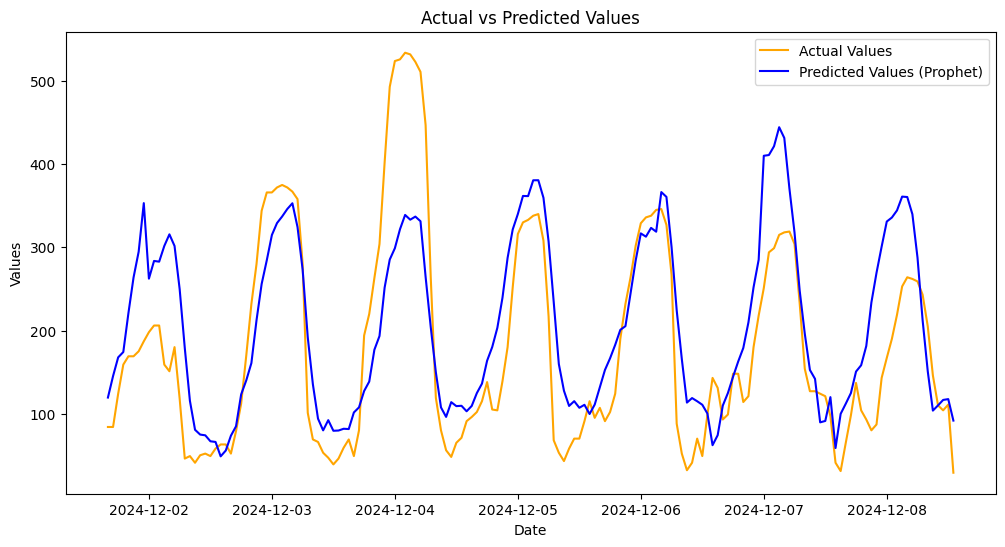

In [305]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_results['ds'], df_results['y'], label='Actual Values', color='orange')

# Plot predicted values
plt.plot(df_results['ds'], df_results['yhat'], label='Predicted Values (Prophet)', color='blue')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.show()


# DARTS

# LSTM 

# CNN 